# Executive Summary - GME Stock Price Forecasting  - 

In this notebook we will explore the GameStop stock price (GME) and we'll build a classifier at a daily level predicting whether the next day's highest stock price will be higher or lower than the previous day's highest stock price.<br/>
Dataset source: https://www.kaggle.com/hananxx/gamestop-historical-stock-prices (dataset collected from Yahoo finance website)
<br/>
This data consists of info about the stock price from February 2002 (the year it was listed) to January 2021.  <br/>

GameStop Corp. is an American video game, consumer electronics, and gaming merchandise retailer. GameStop's stocks have spiked in recent days since the Reddit group blew up the stock price. Now GameStop is up more than 1,700% since the start of January. so, it is interesting to try to predict the stock prices in the next months and see how prediction and time series models will perform in this case.

The problem the model is looking to solve is a forecasting problem in a time series of dataset. Stocks are unpredictable and volatile. Hence, we are looking for the best ML model that would give us a a stock trend in the future days. 
Is the stock going to go up or down? We are solving it using classification with the binaries: 0 or 1.
0 is where it is not recommended to buy the stock, where 1 is recommended. 

**Brief summary of my most interesting results:** <br/>
Having tested four different models, the model which performed the best was Random Forest model.
With accuracy score slightly higher then 50 percent. Although being practical, relying on this model won't be the safest thing to do due to an average of 50/50 chance. <br/>
We still could see some interesting results while exploring the features that were the most significant to the model:
volume, daily percentage change and the third one is the MACD (Moving Average Convergence Divergence) indicator.

We would discuss our analysis and results further as we go deeper into out work.


## Additional Comments:
Following this assignment recommendations, I excluded 2020 (COVID pandemic crisis) and 2008 (financial crisis) from our analyses and worked on 2012-2019 years range. In addition to the previous day’s stock price, I created 4 additional non-trivial features which would be elaborated as we continue: *MACD (moving average convergence divergence) indicator, daily percentage return, SMA (simple moving average) and EMA (exponential moving average) indicators.


*Alberto Antonio Agudelo Aguirre, Ricardo Alfredo Rojas Medina and Néstor
Darío Duque Méndez (2020). Machine learning applied in the stock market
through the Moving Average Convergence Divergence (MACD) indicator.
Investment Management and Financial Innovations, 17(4), 44-60 (https://businessperspectives.org/images/pdf/applications/publishing/templates/article/assets/14191/IMFI_2020_04_Aguirre.pdf


# PART ONE - Exploratory Data Analysis

In [9]:
# sorting the data set in increasing order, and slicing to the data set to relevant time range: 2012-2019

import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv('GME_stock1.csv')
df.describe()
print(df.shape)
df

df
print(df[df['date']=='2012-01-03'].index)
print(df[df['date']=='2019-12-31'].index)

 
df = df[271:2283] 
df.sort_values(by=['date'], inplace=True)
df
GME = df
GME

(4773, 7)
Int64Index([2282], dtype='int64')
Int64Index([271], dtype='int64')


,date,open_price,high_price,low_price,close_price,volume,adjclose_price
2282,2012-01-03,24.430000,24.590000,23.750000,23.790001,2563200.0,16.017811
2281,2012-01-04,23.750000,24.180000,23.690001,24.129999,2079400.0,16.246731
2280,2012-01-05,23.990000,25.280001,23.860001,25.260000,3694000.0,17.007559
2279,2012-01-06,25.209999,25.230000,24.700001,24.870001,3778400.0,16.744976
2278,2012-01-09,24.660000,24.700001,23.379999,23.990000,6956000.0,16.152473
...,...,...,...,...,...,...,...
275,2019-12-24,5.650000,5.670000,5.440000,5.440000,3395500.0,5.440000
274,2019-12-26,5.470000,5.510000,5.250000,5.400000,4264400.0,5.400000
273,2019-12-27,5.420000,5.980000,5.390000,5.900000,11041300.0,5.900000
272,2019-12-30,5.880000,6.250000,5.760000,6.130000,4482100.0,6.130000


In this part we are going to explore the following:
1. Are there any gaps or missing data? 
2. What kind of data types we have in our code, including analyzing the describe() table values.<br/>
3. Visualizations: <br/>
    a. Price distribution<br/>
   Weekly and daily aggregations graphs for:  <br/>
    c. Price change vs. time<br/>
    d. Volume vs. time <br/>
4.  Conclusions for part 1:<br/>
    a. What questions have arised? <br/>
    b. Did we uncover anything that will have an impact on my modeling? <br/>
    c. Did we get any insights on what features to generate? <br/>


## Describing Our Data

In [10]:
GME.describe()

,open_price,high_price,low_price,close_price,volume,adjclose_price
count,2012.000000,2012.000000,2012.000000,2012.000000,2.012000e+03,2012.000000
mean,26.766148,27.172684,26.340487,26.758211,3.370579e+06,20.535450
std,12.685047,12.837100,12.503405,12.676111,2.936781e+06,8.684618
min,3.250000,3.360000,3.150000,3.210000,5.404000e+05,3.210000
25%,16.737500,17.040001,16.557500,16.797500,1.887500e+06,14.158789
50%,24.785001,25.170000,24.475000,24.795000,2.617000e+06,19.239749
75%,37.742499,38.459999,37.085001,37.752500,3.785000e+06,27.721284
max,57.680000,57.740002,56.919998,57.590000,3.935420e+07,41.250896


The adjusted closing price amends a stock's closing price to reflect that stock's value after accounting for any corporate actions. The closing price is the raw price, which is just the cash value of the last transacted price before the market closes.

In our models we care about the adjusted closing price, since traders pay attention to the final price of the stock.  


As for the standard deviation: this is the statistical measure of market volatility, measuring how widely prices are dispersed from the average price. If prices trade in a narrow trading range, the standard deviation will return a low value that indicates low volatility. Conversely, if prices swing wildly up and down, then standard deviation returns a high value that indicates high volatility.

##  Are there any gaps or missing data?

In [11]:
#is null? 
GME.isna().sum()

date              0
open_price        0
high_price        0
low_price         0
close_price       0
volume            0
adjclose_price    0
dtype: int64

So far so good! Seems like all we have no NaN values in our dataset. 

## Data Types:

In [12]:
GME.dtypes


date               object
open_price        float64
high_price        float64
low_price         float64
close_price       float64
volume            float64
adjclose_price    float64
dtype: object

## Visualizations & Data Exploration

### Is there a realtion between a specific month and high/low stock price?
Stock Price With Respect To Time


NameError: name 'W_GME' is not defined

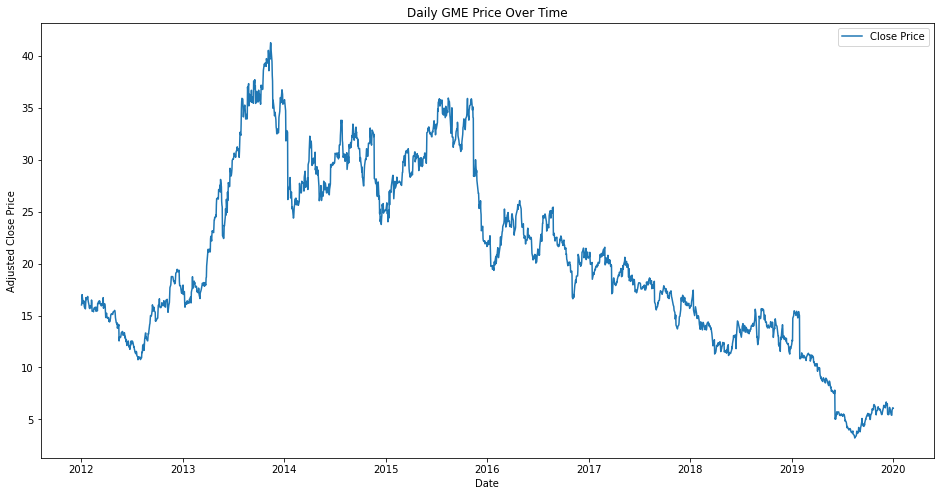

<Figure size 1152x576 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt

GME = GME.set_index(pd.DatetimeIndex(GME['date']))
#GME = GME.drop(['date'], axis=1)
#Daily Graph
plt.figure(figsize=(16,8))
plt.plot(GME["adjclose_price"],label='Close Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Daily GME Price Over Time')
plt.legend()


# resampled dataframe
# 'W' means weekly aggregation 
gmeW=GME.resample('W').mean()

#Weekly Graph
plt.figure(figsize=(16,8))
plt.plot(W_GME["adjclose_price"],label='Close Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Weekly GME Price Over Time')
plt.legend()



We can see that the years 2013-2015 were good years for the stock, later it fell down gradually to its lowest price below the IPO price in 2012. 

It is fair to suspect and question whether the price in our forecasting model would predict an increase in price? or would it stay at the low-price range as we see in 2019 year.


### Volume Chart 

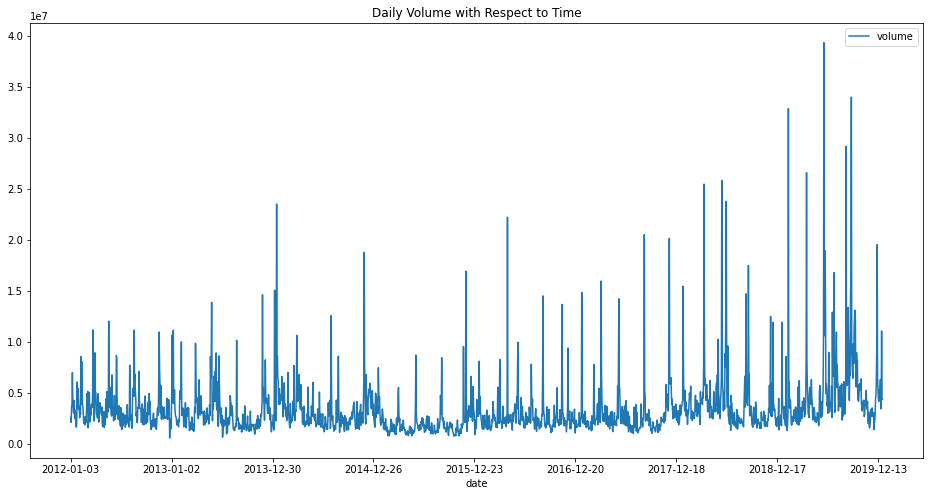

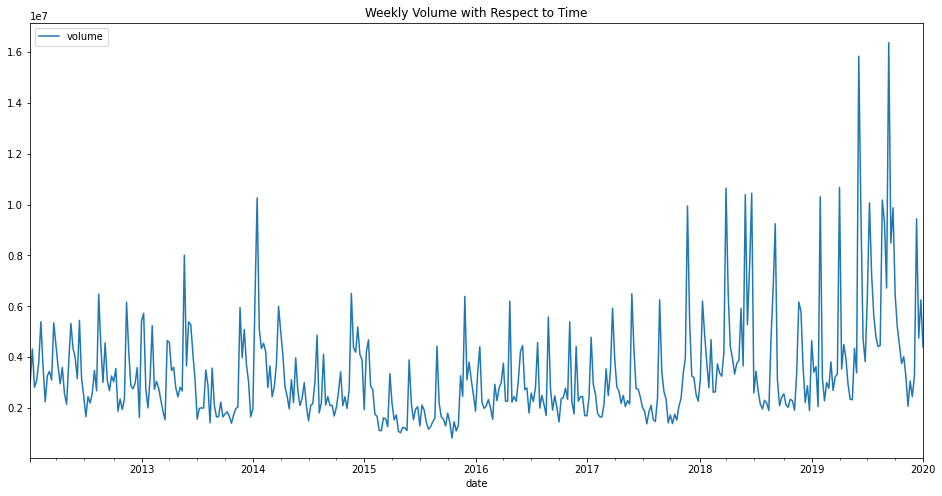

In [14]:
GME.plot(x='date', y='volume',legend=True,figsize=(16,8),title='Daily Volume with Respect to Time');
gmeW.plot( y='volume',legend=True,figsize=(16,8),title='Weekly Volume with Respect to Time');


Interesting to notice that despite the peak stock years (2013-2015), the volume of trade did not significantly increase (not much selling/buying occurred relatively) comparing to 2019-2020 where the stock's volume had the highest volume trade. This insight could affect our model prediction assumption: volume does not necessarily correlate to a price increase. Maybe it does correlate the most to a price decrease?

### What is the most common stock price range?  

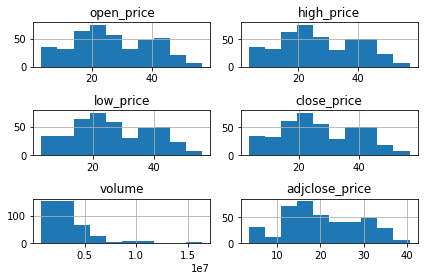

In [15]:
import matplotlib.pyplot as plt

gmeW.hist()
plt.tight_layout()


We can see that the price distribution in mostly on the \\$20 and \\$40 per share.

Can we say the predictions would reveal the same?


# PART TWO  - PRE PROCESSING

## Feature Engineering

### Daily Precentage Change

Day-to-day percentage change(Daily returns)
Daily percentage change in the price of the stock is calculated on the basis of percentage change between 2 consecutive days’ closing prices. Let’s say if the closing price of the stock yesterday was \\$500 and today the stock closed as $550. So, the percentage change is 10%. i.e. ((550–500) / 500)*100. No mystery here!
Accordingly, we’ll introduce a new column ‘Day_Perc_Change’ denoting the daily returns in the price of the stock. This can be done using in-built pct_change() function in python.

,open_price,high_price,low_price,close_price,volume,adjclose_price,Day_Perc_Change
date,,,,,,,
2012-01-08,24.316666,24.896667,24.083334,24.753333,3.183933e+06,16.666422,1.522734
2012-01-15,24.272000,24.402000,23.650000,24.058000,4.315660e+06,16.198256,-1.102031
2012-01-22,23.967500,24.440000,23.652500,24.160000,2.814075e+06,16.266933,1.114040
2012-01-29,24.674000,24.830000,24.084000,24.706000,3.073920e+06,16.634553,-0.182671
2012-02-05,23.664000,23.808000,23.310000,23.464000,3.801880e+06,15.798315,-0.556235
...,...,...,...,...,...,...,...
2019-12-08,6.254000,6.466000,6.154000,6.360000,3.257320e+06,6.360000,1.096406
2019-12-15,5.824000,6.120000,5.628000,5.880000,9.437920e+06,5.880000,-3.775055
2019-12-22,5.844000,6.080000,5.760000,5.954000,4.749800e+06,5.954000,1.994184


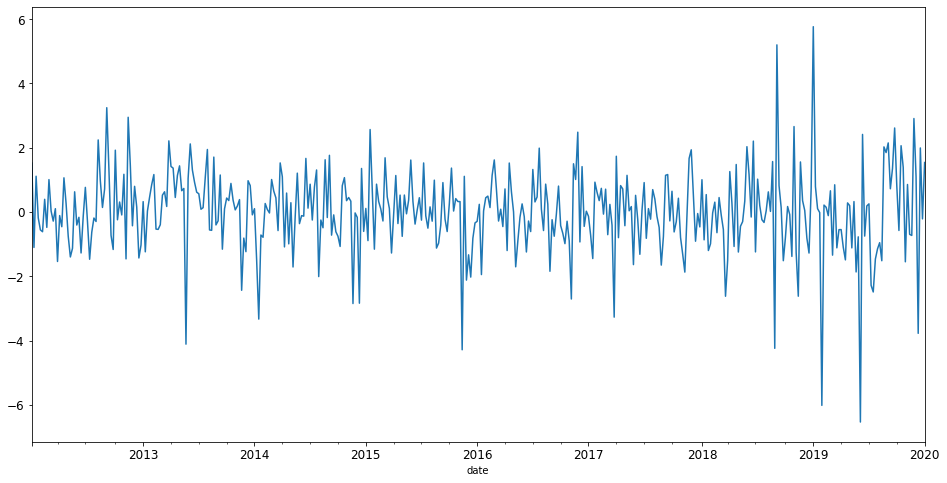

In [16]:
GME['Day_Perc_Change'] =GME['adjclose_price'].pct_change()*100
GME.head()

#dropping the first value Day_Perc_Change column since it's NaN
GME.dropna(axis = 0, inplace = True)

GME.head()

gmeW =GME.resample('W').mean()

gmeW['Day_Perc_Change'].plot(figsize = (16, 8), fontsize = 12)
gmeW

It can be observed that for most of the days, the returns are between -4% to 3.5% with few spikes in between peaking to 6% mark on both the sides.


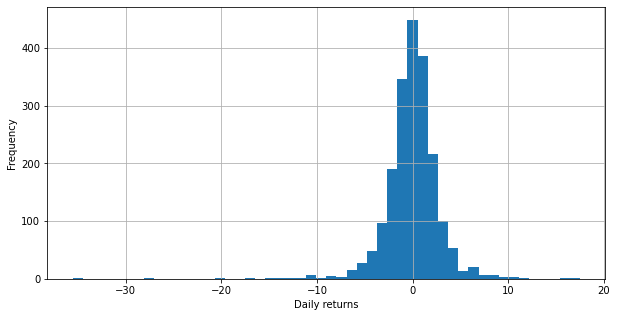

count    2011.000000
mean       -0.007082
std         2.804674
min       -35.549874
25%        -1.265796
50%         0.094834
75%         1.339022
max        17.501923
Name: Day_Perc_Change, dtype: float64

In [17]:
#Plotting daily returns distribution histogram —

GME['Day_Perc_Change'].hist(bins = 50, figsize = (10,5)) 
plt.xlabel('Daily returns')
plt.ylabel('Frequency')
plt.show()
#satistics for a weekly aggregation 
GME.Day_Perc_Change.describe()

What was the daily return of the stock on average?
The daily returns histogram is centered about origin. For the past 2 years, the mean daily returns has been about -0.0071 and for most of the days the daily return was negative implying that the GME stock has been dropping in its value.

### Simple Moving Average (SMA)

The most commonly used Moving Averages (MAs) are the simple and exponential moving average. Simple Moving Average (SMA) takes the average over some set number of time periods. So a 10 period SMA would be over 10 periods (usually meaning 10 trading days).

The Simple Moving Average formula is a very basic arithmetic mean over the number of periods.

The Exponential Moving Average (EMA) is a wee bit more involved.<br/>
First, you should find the SMA. Second, calculate the smoothing factor. Then, use your smoothing factor with the previous EMA to find a new value. In this way, the latest prices are given higher weights, whereas the SMA assigns equal weight to all periods. 

In [18]:
# create 20 days simple moving average column
GME['20_SMA'] = GME['close_price'].rolling(window = 20, min_periods = 1).mean()
# create 50 days simple moving average column
GME['50_SMA'] = GME['close_price'].rolling(window = 50, min_periods = 1).mean()
# display first few rows
print(GME.isna().sum())
GME.head()

date               0
open_price         0
high_price         0
low_price          0
close_price        0
volume             0
adjclose_price     0
Day_Perc_Change    0
20_SMA             0
50_SMA             0
dtype: int64


,date,open_price,high_price,low_price,close_price,volume,adjclose_price,Day_Perc_Change,20_SMA,50_SMA
date,,,,,,,,,,
2012-01-04,2012-01-04,23.750000,24.180000,23.690001,24.129999,2079400.0,16.246731,1.429159,24.129999,24.129999
2012-01-05,2012-01-05,23.990000,25.280001,23.860001,25.260000,3694000.0,17.007559,4.682961,24.695000,24.695000
2012-01-06,2012-01-06,25.209999,25.230000,24.700001,24.870001,3778400.0,16.744976,-1.543918,24.753333,24.753333
2012-01-09,2012-01-09,24.660000,24.700001,23.379999,23.990000,6956000.0,16.152473,-3.538390,24.562500,24.562500
2012-01-10,2012-01-10,24.059999,24.309999,23.450001,24.230000,3865600.0,16.314062,1.000396,24.496000,24.496000


Certain periods on a moving average are widely used. Many technical traders and market participants will cite the 10, 20, 50, 100, or 200 day moving averages. <br/>
It all depends on preference or desired granularity. Breaks above and below the moving average are important signals and trigger active traders and algorithms to execute trades depending on if the break is above or below the moving average.

We we will use the 20 and 50 days of moving averages.


### Exponential  Moving Average (EMA)

In [19]:
# Create 20 days exponential moving average column
GME['20_EMA'] = GME['close_price'].ewm(span = 20, adjust = False).mean()
# Create 50 days exponential moving average column
GME['50_EMA'] = GME['close_price'].ewm(span = 50, adjust = False).mean()
GME

,date,open_price,high_price,low_price,close_price,volume,adjclose_price,Day_Perc_Change,20_SMA,50_SMA,20_EMA,50_EMA
date,,,,,,,,,,,,
2012-01-04,2012-01-04,23.750000,24.180000,23.690001,24.129999,2079400.0,16.246731,1.429159,24.129999,24.129999,24.129999,24.129999
2012-01-05,2012-01-05,23.990000,25.280001,23.860001,25.260000,3694000.0,17.007559,4.682961,24.695000,24.695000,24.237618,24.174313
2012-01-06,2012-01-06,25.209999,25.230000,24.700001,24.870001,3778400.0,16.744976,-1.543918,24.753333,24.753333,24.297845,24.201595
2012-01-09,2012-01-09,24.660000,24.700001,23.379999,23.990000,6956000.0,16.152473,-3.538390,24.562500,24.562500,24.268527,24.193297
2012-01-10,2012-01-10,24.059999,24.309999,23.450001,24.230000,3865600.0,16.314062,1.000396,24.496000,24.496000,24.264857,24.194736
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,2019-12-24,5.650000,5.670000,5.440000,5.440000,3395500.0,5.440000,-3.030304,6.040500,5.969400,5.900216,5.804738
2019-12-26,2019-12-26,5.470000,5.510000,5.250000,5.400000,4264400.0,5.400000,-0.735293,6.005500,5.965200,5.852576,5.788866
2019-12-27,2019-12-27,5.420000,5.980000,5.390000,5.900000,11041300.0,5.900000,9.259259,5.983000,5.965600,5.857093,5.793224


### MACD

Graph results analysis: <br/>

When the signal line (red one) crosses the MACD (green) line, it is time to sell if the green is below and buy if the green is above.

Notice that this is done on historical data and is no guarantee it will work in the future. While the results look pretty promising, it is not wise to make your investments solely on one indicator. <br/>
source: https://www.learnpythonwithrune.org/pandas-calculate-the-moving-average-convergence-divergence-macd-for-a-stock/


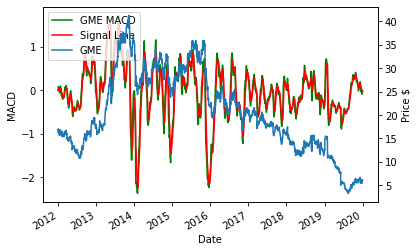

In [20]:
#Daliy MACD
adj_close= GME['adjclose_price']
exp1 = adj_close.ewm(span=12, adjust=False).mean()
exp2 = adj_close.ewm(span=26, adjust=False).mean()
macd = exp1 - exp2
exp3 = macd.ewm(span=9, adjust=False).mean()
GME['MACD'] = macd

macd.plot(label='GME MACD', color='g')
ax = exp3.plot(label='Signal Line', color='r')
adj_close.plot(ax=ax, secondary_y=True, label='GME')

ax.set_ylabel('MACD')
ax.right_ax.set_ylabel('Price $')
ax.set_xlabel('Date')
lines = ax.get_lines() + ax.right_ax.get_lines()
ax.legend(lines, [l.get_label() for l in lines], loc='upper left')



In [21]:
GME = GME.drop(['date'], axis=1)


In [22]:
GME.corr()
GME

,open_price,high_price,low_price,close_price,volume,adjclose_price,Day_Perc_Change,20_SMA,50_SMA,20_EMA,50_EMA,MACD
date,,,,,,,,,,,,
2012-01-04,23.750000,24.180000,23.690001,24.129999,2079400.0,16.246731,1.429159,24.129999,24.129999,24.129999,24.129999,0.000000
2012-01-05,23.990000,25.280001,23.860001,25.260000,3694000.0,17.007559,4.682961,24.695000,24.695000,24.237618,24.174313,0.060693
2012-01-06,25.209999,25.230000,24.700001,24.870001,3778400.0,16.744976,-1.543918,24.753333,24.753333,24.297845,24.201595,0.086606
2012-01-09,24.660000,24.700001,23.379999,23.990000,6956000.0,16.152473,-3.538390,24.562500,24.562500,24.268527,24.193297,0.058656
2012-01-10,24.059999,24.309999,23.450001,24.230000,3865600.0,16.314062,1.000396,24.496000,24.496000,24.264857,24.194736,0.048979
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,5.650000,5.670000,5.440000,5.440000,3395500.0,5.440000,-3.030304,6.040500,5.969400,5.900216,5.804738,-0.056617
2019-12-26,5.470000,5.510000,5.250000,5.400000,4264400.0,5.400000,-0.735293,6.005500,5.965200,5.852576,5.788866,-0.088211
2019-12-27,5.420000,5.980000,5.390000,5.900000,11041300.0,5.900000,9.259259,5.983000,5.965600,5.857093,5.793224,-0.072073


**Classification problem: creating column 'TREND' where:**
*  **1 = next day's price stock is higher = BUY**
*  **0 = next day's price stock is higher = HOLD/SELL** 

In [23]:
trend = np.where(GME['adjclose_price'].shift(-1) > GME['adjclose_price'],1,0)
GME['TREND'] = trend
GME

,open_price,high_price,low_price,close_price,volume,adjclose_price,Day_Perc_Change,20_SMA,50_SMA,20_EMA,50_EMA,MACD,TREND
date,,,,,,,,,,,,,
2012-01-04,23.750000,24.180000,23.690001,24.129999,2079400.0,16.246731,1.429159,24.129999,24.129999,24.129999,24.129999,0.000000,1
2012-01-05,23.990000,25.280001,23.860001,25.260000,3694000.0,17.007559,4.682961,24.695000,24.695000,24.237618,24.174313,0.060693,0
2012-01-06,25.209999,25.230000,24.700001,24.870001,3778400.0,16.744976,-1.543918,24.753333,24.753333,24.297845,24.201595,0.086606,0
2012-01-09,24.660000,24.700001,23.379999,23.990000,6956000.0,16.152473,-3.538390,24.562500,24.562500,24.268527,24.193297,0.058656,1
2012-01-10,24.059999,24.309999,23.450001,24.230000,3865600.0,16.314062,1.000396,24.496000,24.496000,24.264857,24.194736,0.048979,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,5.650000,5.670000,5.440000,5.440000,3395500.0,5.440000,-3.030304,6.040500,5.969400,5.900216,5.804738,-0.056617,0
2019-12-26,5.470000,5.510000,5.250000,5.400000,4264400.0,5.400000,-0.735293,6.005500,5.965200,5.852576,5.788866,-0.088211,1
2019-12-27,5.420000,5.980000,5.390000,5.900000,11041300.0,5.900000,9.259259,5.983000,5.965600,5.857093,5.793224,-0.072073,1


In [24]:

#Features Scaling
import sklearn as sk
from sklearn.preprocessing import StandardScaler

sc = sk.preprocessing.StandardScaler()

GME[['open_price','high_price','low_price','close_price','volume','Day_Perc_Change', '20_SMA' ,'50_SMA', '20_EMA','50_EMA','MACD','adjclose_price']] = StandardScaler().fit_transform(GME[['open_price','high_price','low_price','close_price','volume','Day_Perc_Change', '20_SMA' ,'50_SMA', '20_EMA','50_EMA','MACD','adjclose_price']])

GME.isna().sum()
GME

,open_price,high_price,low_price,close_price,volume,adjclose_price,Day_Perc_Change,20_SMA,50_SMA,20_EMA,50_EMA,MACD,TREND
date,,,,,,,,,,,,,
2012-01-04,-0.237866,-0.233230,-0.212086,-0.207455,-0.439803,-0.494121,0.512216,-0.216964,-0.232208,-0.217465,-0.234034,0.057315,1
2012-01-05,-0.218945,-0.147540,-0.198490,-0.118310,0.109993,-0.406509,1.672639,-0.171852,-0.186217,-0.208848,-0.230399,0.154074,0
2012-01-06,-0.122768,-0.151435,-0.131308,-0.149077,0.138733,-0.436746,-0.548092,-0.167194,-0.181469,-0.204025,-0.228161,0.195385,0
2012-01-09,-0.166127,-0.192722,-0.236880,-0.218500,1.220754,-0.504975,-1.259393,-0.182431,-0.197003,-0.206373,-0.228842,0.150826,1
2012-01-10,-0.213427,-0.223103,-0.231281,-0.199566,0.168426,-0.486368,0.359303,-0.187741,-0.202416,-0.206667,-0.228723,0.135400,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,-1.664754,-1.675159,-1.671705,-1.681902,0.008349,-1.738558,-1.078191,-1.661320,-1.710456,-1.677199,-1.737382,-0.032946,0
2019-12-26,-1.678944,-1.687623,-1.686901,-1.685058,0.304223,-1.743164,-0.259707,-1.664115,-1.710798,-1.681014,-1.738684,-0.083315,1
2019-12-27,-1.682886,-1.651010,-1.675704,-1.645613,2.611861,-1.685587,3.304714,-1.665911,-1.710766,-1.680652,-1.738327,-0.057587,1


In [25]:
y=GME['TREND']
y2=y
y2 = np.where(GME['TREND']== 1, 1, 0)
np.ravel(y2)
y=y2
X = GME.drop("TREND", axis=1)
#60% ,20%, 20%
train_size = int(len(GME)*0.6)
X_train, y_train = X[:train_size],y[:train_size]

validate_size=int(len(GME)*0.8)
X_valid, y_valid = X[train_size:validate_size],y[train_size:validate_size]

X_test, y_test = X[validate_size:],y[validate_size:]


X_train.shape, y_train.shape, X_valid.shape, y_valid.shape,X_test.shape, y_test.shape
y_valid.reshape(-1,1)
y_test.reshape(-1,1)
y_train.reshape(-1,1)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape,X_test.shape, y_test.shape


((1206, 12), (1206,), (402, 12), (402,), (403, 12), (403,))

# PART THREE - MODELS TRAINING : 

**Logistic Regression, Random Forest, Keras and LSTM**



### Logistic Regression Model

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [33]:
model.score(X_train,y_train)

0.538971807628524

In [34]:
model.score(X_test,y_test)

0.45161290322580644

In [35]:
predicted =model.predict(X_test)


In [36]:
dframe = pd.DataFrame({'Actual': y_test,'Predicted':predicted}) 
dframe

,Actual,Predicted
0,1,1
1,1,1
2,0,1
3,1,1
4,1,0
...,...,...
398,0,1
399,1,1
400,1,0
401,0,0


In [39]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Evaluate the classifier on test set BEFORE tunning')
evaluate_preds_lr_before = evaluate_preds(y_test, predicted)



Evaluate the classifier on test set BEFORE tunning
Acc: 45.16%
Precision: 0.45
Recall: 0.83
F1 score: 0.58


Hmm... our precision score is not in such a great standing. Let us see if we could improve it with Gridsearch.

### Improving Logistic Regression Model

First predictions = baseline predictions. First model = baseline model.

From a data perspective:

Could we collect more data? (generally, the more data, the better)
Could we improve our data?
From a model perspective:

Is there a better model we could use?
Could we improve the current model?
Hyperparameters vs. Parameters

Parameters = model find these patterns in data
Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns
Three ways to adjust hyperparameters:

By hand
Randomly with RandomSearchCV
Exhaustively with GridSearchCV 

Hyperparameters get tuned on the validation set 

In [40]:

def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

#define hyperparameters and setup GridSearchCV
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search_ln = GridSearchCV(estimator=model, param_grid=grid, cv=3,error_score=0)
grid_search_ln = grid_search_ln.fit(X_valid, y_valid)


gs_y_preds = grid_search_ln.predict(X_test)

# evaluate the predictions
print('Evaluate the classifier on test set AFTER tunning')
evaluate_preds_lr_after = evaluate_preds(y_test, gs_y_preds)


Evaluate the classifier on test set AFTER tunning
Acc: 44.91%
Precision: 0.45
Recall: 0.97
F1 score: 0.62


In [42]:
grid_search_ln.best_params_


{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}

It's interesting to see that our precision and accuracy score did not improve at all, but what did significantly were the Recall and F1 score parameters. <br/>
* Presicion - how many out of predicted positives are actual positvies? (no false postivies=1.0)
* Recall- how many of the Actual Positives our model capture through labeling it as Positive (True Positive). (no flase negatives = 1.0)
* F1 - A combo of presicion + recall 

### Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=1)
rf.fit(X_train, y_train)

rf.score(X_test,y_test)

0.45905707196029777

In [44]:
rf.score(X_train,y_train)

1.0

In [45]:
y_preds = rf.predict(X_test)
y_preds[:10]



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [46]:
np.array(y_test[:10])

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1])

In [47]:
# Evaluate the predictions
print('Evaluate the classifier on test set BEFORE tunning')
evaluate_preds_rf_before = evaluate_preds(y_test, y_preds)



Evaluate the classifier on test set BEFORE tunning
Acc: 45.91%
Precision: 0.46
Recall: 1.00
F1 score: 0.63


On avarage for every single prediction our model is 0.46 away from the target (our close price). Still a low score.

### Improving Random Forest Model


In [48]:
grid_rf = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

grid_search_rf = GridSearchCV(estimator=rf, param_grid=grid_rf, cv=2,verbose=2)
grid_search_rf = grid_search_rf.fit(X_valid, y_valid)


gs_y_preds_rf = grid_search_rf.predict(X_test)

# evaluate the predictions
print('Evaluate the classifier on test set AFTER tunning')
evaluate_preds_rf_after = evaluate_preds(y_test, gs_y_preds_rf)


Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.8s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   10.6s finished


Evaluate the classifier on test set AFTER tunning
Acc: 53.10%
Precision: 0.49
Recall: 0.45
F1 score: 0.47


Wow! the grid search on random forest worked quite nicely. Right now our model is at 53 percent. which is slightly more encouraging.

In [49]:
grid_search_rf.best_params_


{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 500}

### Keras Sequential

In [50]:
# first neural network with keras tutorial
from keras.models import Sequential
from keras.layers import Dense

# define the keras model
kerasModel = Sequential()
kerasModel.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = X.shape[1]))
kerasModel.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# compile the keras model
kerasModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
kerasModel.fit(X_train, y_train, epochs=150, batch_size=10)
# evaluate the keras model
_, accuracy = kerasModel.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
121/121 [==============================] - 1s 1ms/step - loss: 0.6940 - accuracy: 0.5164
Epoch 2/150
121/121 [==============================] - 0s 977us/step - loss: 0.6895 - accuracy: 0.5257
Epoch 3/150
121/121 [==============================] - 0s 807us/step - loss: 0.6877 - accuracy: 0.5312
Epoch 4/150
121/121 [==============================] - 0s 808us/step - loss: 0.6864 - accuracy: 0.5590
Epoch 5/150
121/121 [==============================] - 0s 839us/step - loss: 0.6889 - accuracy: 0.5364
Epoch 6/150
121/121 [==============================] - 0s 987us/step - loss: 0.6860 - accuracy: 0.5383
Epoch 7/150
121/121 [==============================] - 0s 1ms/step - loss: 0.6822 - accuracy: 0.5535
Epoch 8/150
121/121 [==============================] - 0s 965us/step - loss: 0.6833 - accuracy: 0.5547
Epoch 9/150
121/121 [==============================] - 0s 951us/step - loss: 0.6823 - accuracy: 0.5531
Epoch 10/150
121/121 [==============================] - 0s 964us/step - loss:

In [56]:
#evaluate_preds_keras = evaluate_preds(y_test, gs_y_preds_rf)

Our Keras model has performed the best so far with an accuracy score of almost 60% !

### LSTM MODEL

In [58]:
from sklearn.preprocessing import MinMaxScaler
import numpy

from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

X_train_np = numpy.array(X_train)
scalar = MinMaxScaler(feature_range=(0, 1)) 

scaled_data = scalar.fit_transform(X_train_np)

train_data = scaled_data[0:60, : ]

#Splitting the data
x_train=[]
y_train_lstm = []

for i in range(10, len(train_data)):
    x_train.append(train_data[i-10:i,0])
    y_train_lstm.append(train_data[i,0])
    
#Convert to numpy arrays
x_train, y_train_lstm = np.array(x_train), np.array(y_train_lstm)

#Reshape the data into 3-D array
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


from keras.layers import Dropout

# Initialising the RNN
modelLSTM = Sequential()

modelLSTM.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
modelLSTM.add(Dropout(0.2))

# Adding a second LSTM layer and Dropout layer
modelLSTM.add(LSTM(units = 50, return_sequences = True))
modelLSTM.add(Dropout(0.2))

# Adding a third LSTM layer and Dropout layer
modelLSTM.add(LSTM(units = 50, return_sequences = True))
modelLSTM.add(Dropout(0.2))

# Adding a fourth LSTM layer and and Dropout layer
modelLSTM.add(LSTM(units = 50))
modelLSTM.add(Dropout(0.2))

# Adding the output layer
# For Full connection layer we use dense
# As the output is 1D so we use unit=1
modelLSTM.add(Dense(units = 1))

#compile and fit the model on 30 epochs
modelLSTM.compile(optimizer = 'adam', loss = 'mean_squared_error')
modelLSTM.fit(x_train, y_train_lstm, epochs = 30, batch_size = 50)

Epoch 1/30
1/1 [==============================] - 7s 7s/step - loss: 0.0359
Epoch 2/30
1/1 [==============================] - 0s 19ms/step - loss: 0.0279
Epoch 3/30
1/1 [==============================] - 0s 20ms/step - loss: 0.0200
Epoch 4/30
1/1 [==============================] - 0s 21ms/step - loss: 0.0125
Epoch 5/30
1/1 [==============================] - 0s 19ms/step - loss: 0.0067
Epoch 6/30
1/1 [==============================] - 0s 19ms/step - loss: 0.0019
Epoch 7/30
1/1 [==============================] - 0s 20ms/step - loss: 7.8364e-04
Epoch 8/30
1/1 [==============================] - 0s 19ms/step - loss: 0.0027
Epoch 9/30
1/1 [==============================] - 0s 18ms/step - loss: 0.0061
Epoch 10/30
1/1 [==============================] - 0s 17ms/step - loss: 0.0062
Epoch 11/30
1/1 [==============================] - 0s 16ms/step - loss: 0.0037
Epoch 12/30
1/1 [==============================] - 0s 17ms/step - loss: 0.0022
Epoch 13/30
1/1 [==============================] - 0s 16ms/

In [59]:
#Test data set
test_data = scaled_data[60 - 10: , : ]

#splitting the x_test and y_test data sets
x_test = []
y_test_ltsm =  X_train_np[60 : , : ] 

for i in range(10,len(test_data)):
    x_test.append(test_data[i-10:i,0])
    
#Convert x_test to a numpy array 
x_test = np.array(x_test)

#Reshape the data into 3-D array
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [2165]:
#check predicted values
predictions = modelLSTM.predict(x_test) 
#Undo scaling
obj = scaler.fit(predictions)
predictions = obj.inverse_transform(predictions)

#Calculate RMSE score
rmse=np.sqrt(np.mean(((predictions- y_test_ltsm)**2)))
rmse

0.9007558581441847

The RMSE is the square root of the variance of the residuals. It indicates the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values. Whereas R-squared is a relative measure of fit, RMSE is an absolute measure of fit.

# PART FOUR - ROC curve ,Confusion matrices and Classification report

ROC curves are a comparison of a model's true postive rate (tpr) versus a models false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

**ROC Curves**

In [63]:
# Creating a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr, name):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    #plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve for {}". format(name))
    plt.legend()
    plt.show()



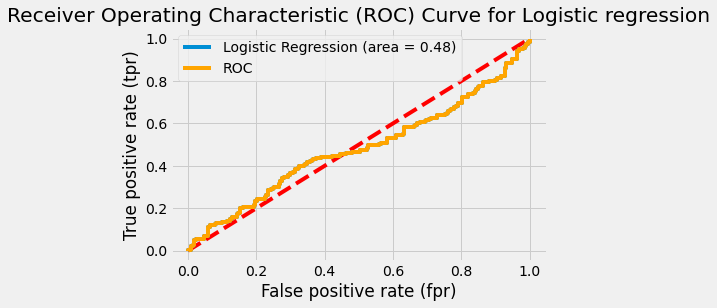

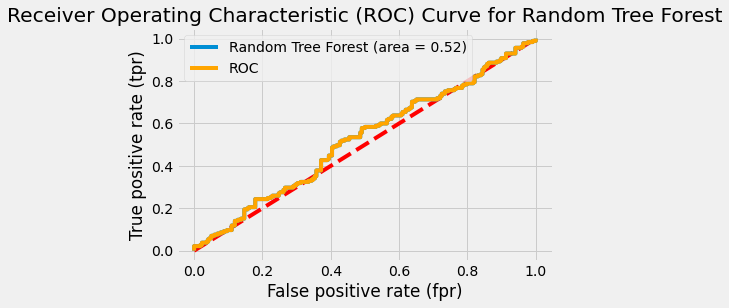

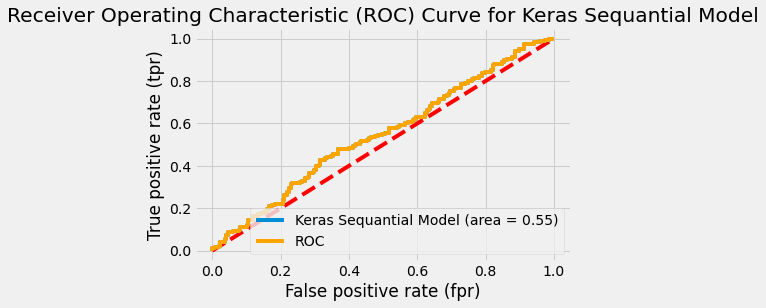

ROC scores:
Logistic regression: 0.524621869575998
Random Tree Forest: 0.524621869575998
Keras Sequantial Model: 0.5474088767666749


In [71]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#################################################logistic regression 
# Make predictions with probabilities
y_prob_lr = grid_search_ln.predict_proba(X_test)

y_prob_lr[:10], len(y_prob_lr)
y_prob_lr_positive = y_prob_lr[:, 1]
y_prob_lr_positive[:10]
# Caculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr_positive)
plt.plot([0, 1], [0, 1],'r--')

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_score(y_test, y_prob_lr_positive))

# Check the false positive rates
fpr
roc_mod_lr = plot_roc_curve(fpr, tpr,"Logistic regression")

####################################################Random Tree
# Make predictions with probabilities
y_probs_rf = grid_search_rf.predict_proba(X_test)
y_prob_rf_positive = y_probs_rf[:, 1]
y_prob_rf_positive[:10]
plt.plot([0, 1], [0, 1],'r--')
# Caculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf_positive)
plt.plot(fpr, tpr, label='Random Tree Forest (area = %0.2f)' % roc_auc_score(y_test, y_prob_rf_positive))
roc_mod_rf = plot_roc_curve(fpr, tpr,'Random Tree Forest')


#####################################################Keras Model

# Make predictions with probabilities
#kerasModel.fit(X, y, epochs=150, batch_size=10)
y_probs_km = kerasModel.predict(X_test)

y_pred=kerasModel.predict(X_test)
y_pred >.5
#y_prob_km_positive = y_predd[:, 1]
#y_prob_km_positive[:10]

# Caculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1],'r--')

plt.plot(fpr, tpr, label='Keras Sequantial Model (area = %0.2f)' % roc_auc_score(y_test, y_probs_km))
roc_mod_km = plot_roc_curve(fpr, tpr,'Keras Sequantial Model')


print ( "ROC scores:")
print ("Logistic regression:",roc_auc_score(y_test, y_prob_rf_positive))
print("Random Tree Forest:",roc_auc_score(y_test, y_prob_rf_positive))
print("Keras Sequantial Model:",roc_auc_score(y_test, y_probs_km))

According to the ROC scores the Keras Sequantial Model scored the best, although, our ROC curves did not perform as well as we wished they would. ROC curves should not touch the liner line and have a nice round shape above it. 

These results are expected as our accuracy scores were in the 50-50 precent range.


### Confusion Matrices
A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused

* 0 - next day is a down price
* 1- next day is a up price

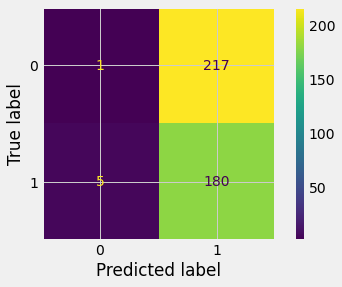

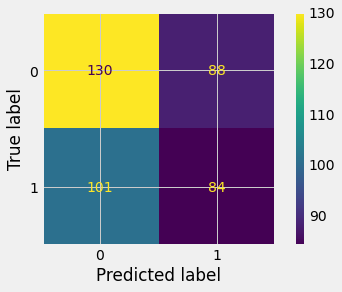

In [100]:

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(grid_search_ln,X_test, y_test)
plot_confusion_matrix(grid_search_rf, X_test, y_test)
y_pred_ks=np.where((y_pred_ks.flatten()> .5) == True, 1,0)
#plot_confusion_matrix(kerasModel, y_test, y_pred_ks)

#First matrix = Logistic Regression
#Second matrix = Random Forest

This is quite interesting: looks like our predictions for True Positive are pretty good! on both of our random forest. <br/>
But also, unfortunately our cases of false negative are high as well. (This explains that 50-50 chances of correct prediction)


In [73]:
y_pred_ks=kerasModel.predict(X_test)
y_pred_ks >.5
metrics.confusion_matrix(y_test, y_pred_ks>.5)
y_pred_ks=np.where((y_pred_ks.flatten()> .5) == True, 1,0)

# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
            y_pred_ks,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])



Predicted Labels,0,1
Actual Labels,,
0,29,189
1,18,167


As for the Keras model- we also got a high score on the true-positive square. 

However, we cannot ignore the predictions of our false-positive. The scores are high there, as a result trusting our models to predict our stock price won't be very wise.


In [74]:
from sklearn.metrics import classification_report


y_preds_lr = grid_search_ln.predict(X_test)
y_preds_rf = grid_search_rf.predict(X_test)

print("Logistic Regression Report")
lrdf = pd.DataFrame(classification_report(y_test, y_preds_lr, output_dict=True))
lrdf

Logistic Regression Report


,0,1,accuracy,macro avg,weighted avg
precision,0.166667,0.453401,0.449132,0.310034,0.298294
recall,0.004587,0.972973,0.449132,0.488780,0.449132
f1-score,0.008929,0.618557,0.449132,0.313743,0.288783
support,218.000000,185.000000,0.449132,403.000000,403.000000


In [75]:
print("Regression Forest Report")
rfdf = pd.DataFrame(classification_report(y_test, y_preds_rf, output_dict=True))
rfdf

Regression Forest Report


,0,1,accuracy,macro avg,weighted avg
precision,0.562771,0.488372,0.531017,0.525571,0.528617
recall,0.596330,0.454054,0.531017,0.525192,0.531017
f1-score,0.579065,0.470588,0.531017,0.524826,0.529268
support,218.000000,185.000000,0.531017,403.000000,403.000000


In [76]:
print("Ketas Sequential Report")
kerasdf = pd.DataFrame(classification_report(y_test, y_pred_ks, output_dict=True))
kerasdf



Ketas Sequential Report


,0,1,accuracy,macro avg,weighted avg
precision,0.617021,0.469101,0.486352,0.543061,0.549117
recall,0.133028,0.902703,0.486352,0.517865,0.486352
f1-score,0.218868,0.617375,0.486352,0.418122,0.401806
support,218.000000,185.000000,0.486352,403.000000,403.000000


### Analysis


* Presicion - how many out of predicted positives are actual positvies? (no false postivies=1.0)
* Recall- how many of the Actual Positives our model capture through labeling it as Positive (True Positive). (no flase negatives = 1.0)
* F1 - A combo of presicion + recall 





Acc: 48.64%
Precision: 0.47
Recall: 0.90
F1 score: 0.62


<AxesSubplot:>

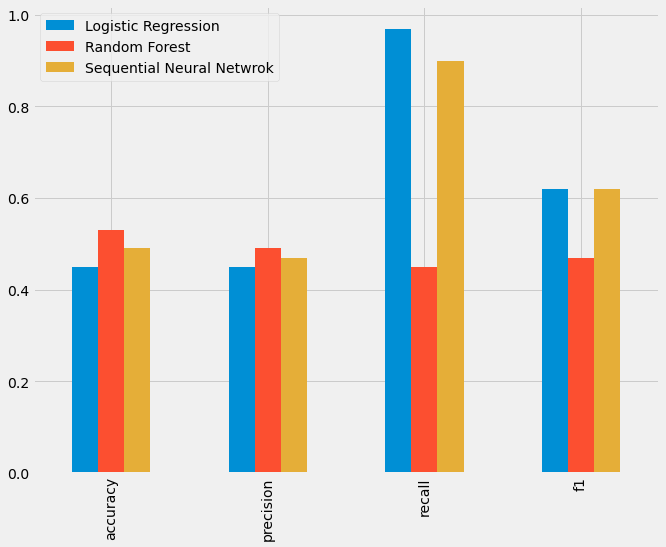

In [77]:
compare_metrics = pd.DataFrame({"Logistic Regression": evaluate_preds_lr_after,
                                "Random Forest": evaluate_preds_rf_after,
                                "Sequential Neural Netwrok": evaluate_preds(y_test,y_pred_ks)})

compare_metrics.plot.bar(figsize=(10, 8))

Seems like the best model in our project is out random forest one (orange) based on the accuracy and the precision scores.


# PART FIVE  -	Assess The Interpretability of the Models

### Logistic Regression

In [78]:
#Logistic Regression Coefficient variables:
model.coef_


array([[ 0.11281574,  0.18912091, -0.14554821,  0.5555961 , -0.13613389,
        -0.11735433, -0.23026372, -0.13788848, -0.60684684, -0.19681127,
         0.2456834 , -0.11887146]])

Coef

A regression coefficient describes the size and direction of the relationship between a predictor and the response variable. Coefficients are the numbers by which the values of the term are multiplied in a regression equation.

Interpretation

Use the coefficient to determine whether a change in a predictor variable makes the event more likely or less likely. The estimated coefficient for a predictor represents the change in the link function for each unit change in the predictor, while the other predictors in the model are held constant.

In [99]:
# Match coef's of features to columns
feature_dict = dict(zip(GME.columns, list(model.coef_[0])))
feature_dict

{'open_price': 0.11281574200535104,
 'high_price': 0.18912091152960617,
 'low_price': -0.14554821496831805,
 'close_price': 0.5555961031510083,
 'volume': -0.13613388780271218,
 'adjclose_price': -0.11735432515222415,
 'Day_Perc_Change': -0.23026372462819333,
 '20_SMA': -0.13788847687963823,
 '50_SMA': -0.6068468382484253,
 '20_EMA': -0.19681127282032854,
 '50_EMA': 0.24568340395643898,
 'MACD': -0.11887146117686649}

Accroding to these results seems like our highest features that affect our predictios are the close price and 50 EMA

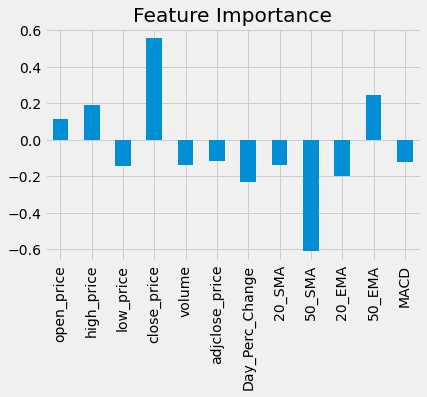

In [88]:
# Visualize feature importance
feature_df= pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

What is interesting to see is that the MACD and 50 SMA together with the rest of our engineered features, did not contribute much to the prediction of the stock price. This is a very important point to notice and requires also deeper exploration.

### Random Forest

In [81]:
#Random Forest Feature Impotance: 

# Find feature importance of our best model
rf.feature_importances_

array([0.07925506, 0.07487918, 0.07311286, 0.07407588, 0.10818791,
       0.08273944, 0.10252093, 0.07940625, 0.0808566 , 0.08134872,
       0.07633545, 0.08728173])

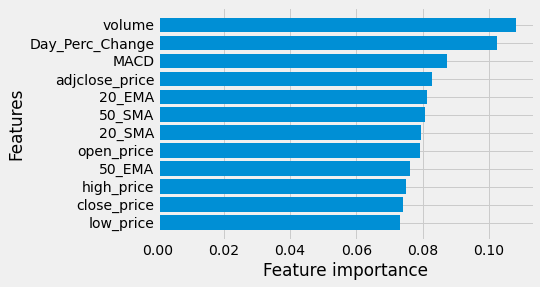

In [82]:
def plot_featuBres(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()
    
plot_features(X_train.columns, rf.feature_importances_)


For our random forest, we see that volume, daily percentage change and MACD were the top 3 important feature that used for prediction. <br/>
It is encouraging to see that the rest of our engineered features were also as equally significant as the MACD.<br/>
This implies the neural network are working better for time series predictions. <br/>
We know this, since the out engineered features are used in technical analysis for trading, and have direct implications for making stock trading decisions.



### Summary Plot (SHAP)

For this summary, we used the nuearal network model to explain our predictions

In [83]:
import shap
import time

In [84]:

X_test_summary = X_train[:100]


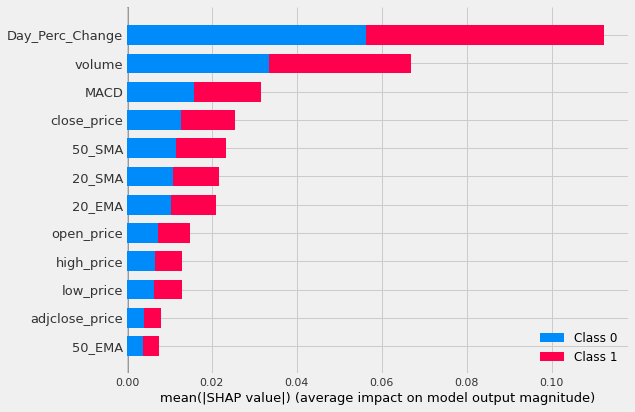

In [85]:
shap.initjs()

# explain all the predictions in the test set
# usinf kmeans, otherwise the data was too big to process, which resulted very long computing time!
explainer = shap.KernelExplainer(grid_search_rf.predict_proba, X_test_summary)
shap_values = explainer.shap_values(X_test_summary)
shap.summary_plot(shap_values, X_test_summary)

shap.force_plot(explainer.expected_value[0], shap_values[0], X_train)

# Final Conclusion

1. The best model was our Random Forest, with an accuracy of 54%. However, it is worth to mention that a 50-50 chance of a stock going up or down is not the safest model to use. <br/>
Moreover, comparing to the rest of the models tested, the accuracy scores were very similar to one another (50% on average). <br/> This tells us that there might be something in our features engineering that might have gone wrong. I have tried to analyze farther this issue, and still could not get to the core of it. 

2. Considering our feature importance graphs: the close price, 50 days SMA and daily percentage change, were the most important features to our models, including the best preforming one. <br/> The close price feature does not surprise us that much since it is very similar to the adjusted close price which was our target variable. <br/> As for the last two features mentioned, we could deduce that the simple average is an important indicator to predict stock price. <br/> As for the daily precent change, we can also say that the future stock price is affected by this simple calculation to forecast the future.

3. Another important detail is our confusion matrices. We saw that we had high cases at the false negative and at the true positive. This confirms the 50-50 chances of correct prediction.

To summarize, we need to think of other indicators that could have improved our models. As well as other Grid Search parameters that could tune our models better. (We saw that the tuning helped slightly but not as we would want). <br/>
The positive takeaway from this exploration is that among all features that are used for trading in the real world, the SMA average, the volume (in the logistic regression model) and the daily percentage change, are important indicators to consider when making a trade decision. 
